<a href="https://colab.research.google.com/github/leegaon0622/Bigdata/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_09%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

그리드 서치

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
params = {'max_depth': range(4, 7, 1),
          'min_samples_split': range(3, 6, 1)
          }
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X, y)
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 4, 'min_samples_split': 3}
0.9666666666666668


랜덤 서치

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
params = {'max_depth': randint(3, 10),
          'min_samples_split': randint(2, 10)
          }
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,n_iter=10, n_jobs=-1)
gs.fit(X, y)
print(gs.best_params_)
print(gs.best_score_)

{'min_samples_split': 6, 'max_depth': 9}
0.9666666666666668


분류 : 피마 인디안 당뇨병 데이터

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

al = RandomForestClassifier(n_estimators=10)
al.fit(X, y)

cscore=cross_val_score(al,X,y,cv=5)  # 교차 검증 k=5
print('accuracy',cscore.mean())
X.shape


accuracy 0.7383753501400561


(768, 8)

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

al = AdaBoostClassifier()
al.fit(X, y)

cscore=cross_val_score(al,X,y,cv=5)
print('accuracy',cscore.mean())

accuracy 0.7631270690094218


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

al = SVC()
al.fit(X, y)

cscore=cross_val_score(al,X,y,cv=5)  # 교차 검증 k=5
print('accuracy',cscore.mean())
X.shape

accuracy 0.7591460826754943


(768, 8)

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

al = XGBClassifier()
al.fit(X, y)

cscore=cross_val_score(al,X,y,cv=5)  # 교차 검증 k=5
print('accuracy',cscore.mean())
X.shape

accuracy 0.7656820303879128


(768, 8)

In [ ]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

al = LGBMClassifier()
al.fit(X, y)

cscore=cross_val_score(al,X,y,cv=5)  # 교차 검증 k=5
print('accuracy',cscore.mean())
X.shape

accuracy 0.7487479840421016


(768, 8)

회귀 : 보스턴 집값

In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.svm import SVR
import pandas as pd
import numpy as np




raw_df = pd.read_csv('/content/Boston_house.csv')

y_target = raw_df['Target']
X_data = raw_df.drop(['Target'], axis=1,inplace=False)

print(y_target.shape)
print(X_data.shape)

rf = SVR()
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

(506,)
(506, 13)
 5 교차 검증의 개별 Negative MSE scores:  [ -29.8   -88.12 -131.41  -82.24  -27.71]
 5 교차 검증의 개별 RMSE scores :  [ 5.46  9.39 11.46  9.07  5.26]
 5 교차 검증의 평균 RMSE : 8.129 


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

raw_df = pd.read_csv('Boston_house.csv')

y_target = raw_df['Target']
X_data = raw_df.drop(['Target'], axis=1,inplace=False)

lr_reg = LinearRegression()
svr_reg = SVR()
#ada_reg = AdaBoostRegressor(random_state=0, n_estimators=1000)
#xgb_reg = XGBRegressor(n_estimators=1000)
#lgb_reg = LGBMRegressor(n_estimators=1000)
ada_reg = AdaBoostRegressor()
xgb_reg = XGBRegressor()
lgb_reg = LGBMRegressor()

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [lr_reg, svr_reg,ada_reg,  xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  LinearRegression  #####
 5 교차 검증의 평균 RMSE : 5.829 
#####  SVR  #####
 5 교차 검증의 평균 RMSE : 8.129 
#####  AdaBoostRegressor  #####
 5 교차 검증의 평균 RMSE : 4.701 
[05:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.114 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.571 


voting

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

clf1 = AdaBoostClassifier()
clf2= SVC()
clf3=LGBMClassifier()

classifier=VotingClassifier(estimators=[('ada',clf1),('svc',clf2),('lgbm',clf3)],verbose=True)
classifier.fit(X,y)


al.fit(X, y)

cscore=cross_val_score(classifier,X,y,cv=5)  # 교차 검증 k=5
print('accuracy',cscore.mean())

[Voting] ...................... (1 of 3) Processing ada, total=   0.1s
[Voting] ...................... (2 of 3) Processing svc, total=   0.0s
[Voting] ..................... (3 of 3) Processing lgbm, total=   0.1s
[Voting] ...................... (1 of 3) Processing ada, total=   0.1s
[Voting] ...................... (2 of 3) Processing svc, total=   0.0s
[Voting] ..................... (3 of 3) Processing lgbm, total=   0.0s
[Voting] ...................... (1 of 3) Processing ada, total=   0.1s
[Voting] ...................... (2 of 3) Processing svc, total=   0.0s
[Voting] ..................... (3 of 3) Processing lgbm, total=   0.1s
[Voting] ...................... (1 of 3) Processing ada, total=   0.1s
[Voting] ...................... (2 of 3) Processing svc, total=   0.0s
[Voting] ..................... (3 of 3) Processing lgbm, total=   0.1s
[Voting] ...................... (1 of 3) Processing ada, total=   0.1s
[Voting] ...................... (2 of 3) Processing svc, total=   0.0s
[Votin

feature importance

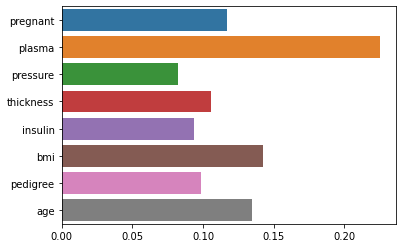

In [ ]:
import seaborn as sns
%matplotlib inline
import pandas as pd


df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

xgb_cls = XGBClassifier(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
xgb_cls.fit(X, y)

feature_series = pd.Series(data=xgb_cls.feature_importances_, index=X.columns )
#feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

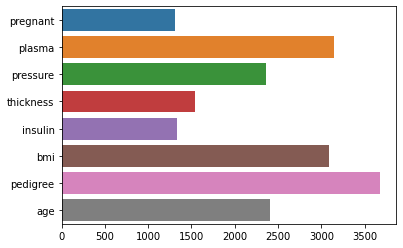

In [ ]:
import seaborn as sns
%matplotlib inline
import pandas as pd


df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

lgbm_cls = LGBMClassifier(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
lgbm_cls.fit(X, y)

feature_series = pd.Series(data=lgbm_cls.feature_importances_, index=X.columns )
#feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

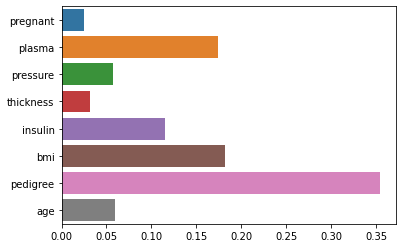

In [ ]:
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

df = pd.read_csv('/content/pima-indians-diabetes3.csv')

# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]


ada_cls = AdaBoostClassifier(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
ada_cls.fit(X, y)

feature_series = pd.Series(data=ada_cls.feature_importances_, index=X.columns )
#feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)